In [2]:
import numpy as np
import pandas as pd
import pywt
import torch
import torch.nn as nn
from scipy import signal
from scipy import optimize
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import Image
from matplotlib.pyplot import figure

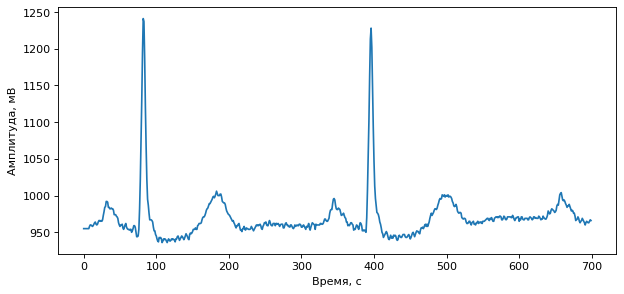

In [3]:
data = pd.read_csv('/content/101.csv')
columns = data.columns

signal = data[columns[1]]
figure(figsize=(9, 4), dpi=80)
plt.xlabel('Время, с')
plt.ylabel('Амплитуда, мВ')
plt.plot(signal[0:700])



In [ ]:
data.head()

,'sample #','MLII','V1'
0,0,955,992
1,1,955,992
2,2,955,992
3,3,955,992
4,4,955,992


In [4]:
l=len(signal)
l

650000

In [4]:
t = data[columns[0]][0:len(signal)]/360
s = signal[0:len(signal)]


In [5]:
freq = np.linspace(1, 360/2, 3250)

In [6]:
widths = 6*360 / (2*freq*np.pi)

In [8]:
print(pywt.wavelist())

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'haar', 'mexh', 'morl', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'shan', 'sym2', 'sym3

In [7]:
coefs = pywt.cwt(s, widths,'gaus1')
freqs = pywt.cwt(s, widths,'gaus1')

KeyboardInterrupt: 

In [10]:
freqs*60

(array([[-16037.48435044, -16037.76549491, -16034.68245199, ...,
          15712.9417147 ,  15717.09667313,  15724.96392344],
        [-15618.81768917, -15616.45639064, -15611.45292462, ...,
          15312.11766654,  15314.08301258,  15314.71633566],
        [-15219.8665347 , -15216.45667277, -15216.59266511, ...,
          14933.90122241,  14932.31669985,  14932.49027995],
        ...,
        [ -1082.08460378,   -610.55164328,   -196.20685775, ...,
            223.19481413,    652.52393559,   1088.1159344 ],
        [ -1081.91893975,   -610.45816958,   -196.17675762, ...,
            223.14004224,    642.84438176,   1087.94934699],
        [ -1087.86925651,   -610.36473608,   -196.1467309 , ...,
            223.11229469,    642.73318608,   1087.79564424]]),
 array([0.00058178, 0.00061383, 0.00064588, ..., 0.10465565, 0.1046877 ,
        0.10471976]),
 array([[-16037.48435044, -16037.76549491, -16034.68245199, ...,
          15712.9417147 ,  15717.09667313,  15724.96392344],
        

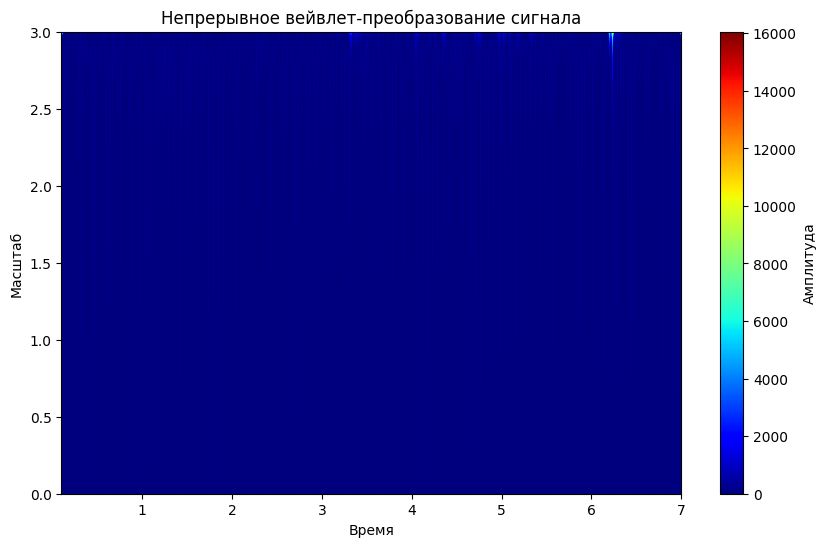

In [11]:
coefficients, frequencies = pywt.cwt(s, widths, wavelet='gaus1')
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coefficients), aspect='auto', cmap='jet', extent=[0.1, 7, 0, 3])
plt.colorbar(label="Амплитуда")
plt.ylabel("Масштаб")
plt.xlabel("Время")
plt.title("Непрерывное вейвлет-преобразование сигнала")
plt.show()

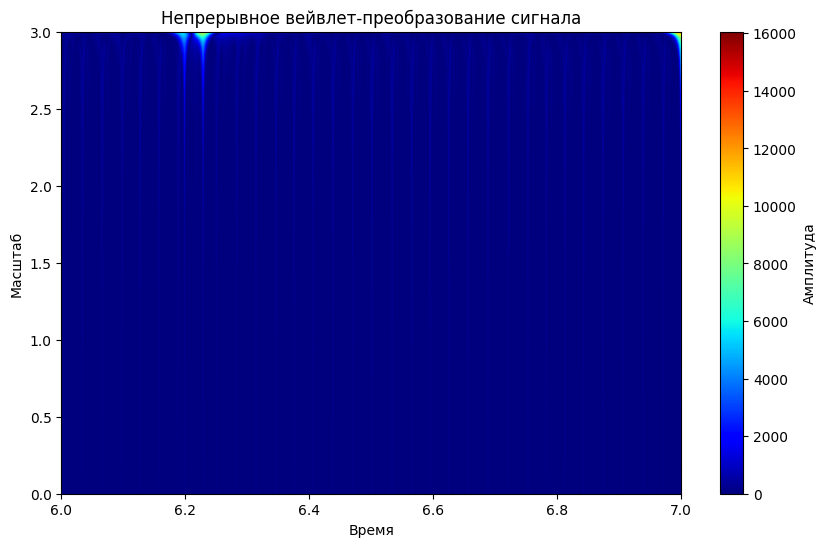

In [12]:
coefficients, frequencies = pywt.cwt(s, widths, wavelet='gaus1')
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coefficients), aspect='auto', cmap='jet', extent=[0.1, 7, 0, 3])
plt.colorbar(label="Амплитуда")
plt.ylabel("Масштаб")
plt.xlabel("Время")
plt.title("Непрерывное вейвлет-преобразование сигнала")
plt.xlim(6, 7)
plt.show()